# **Introduccion**

El proposito de este proyecto es definir las areas de mayor demanda para traslados vehiculares asi como los mayores competidores de la empresa Zuber, para en base a eso reaizar estategias para la empresa.

In [1]:
import pandas as pd

# Cargar los archivos CSV
path_01 = '/datasets/project_sql_result_01.csv'
path_04 = '/datasets/project_sql_result_04.csv'
path_07 = '/datasets/project_sql_result_07.csv'

# Leer los archivos CSV en DataFrames
df_sql_result_01 = pd.read_csv(path_01)
df_sql_result_04 = pd.read_csv(path_04)

# Mostrar las primeras filas de ambos DataFrames para estudiar su contenido
print(df_sql_result_01.head())
print(df_sql_result_04.head())

# Verificar los tipos de datos
print(df_sql_result_01.info())
print(df_sql_result_04.info())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  D

# **Paso 4. Análisis exploratorio de datos (Python)**

<Figure size 1200x600 with 0 Axes>

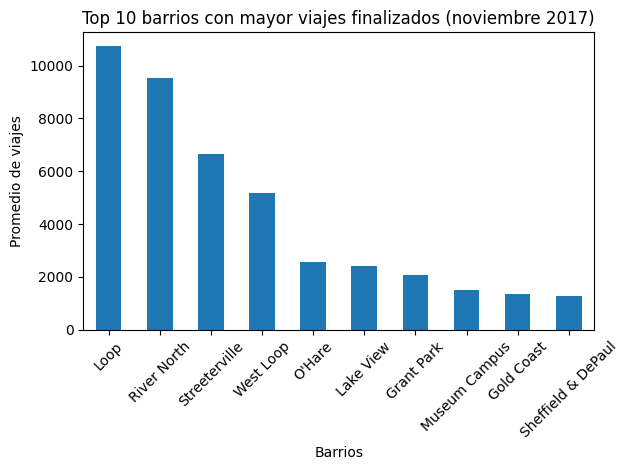

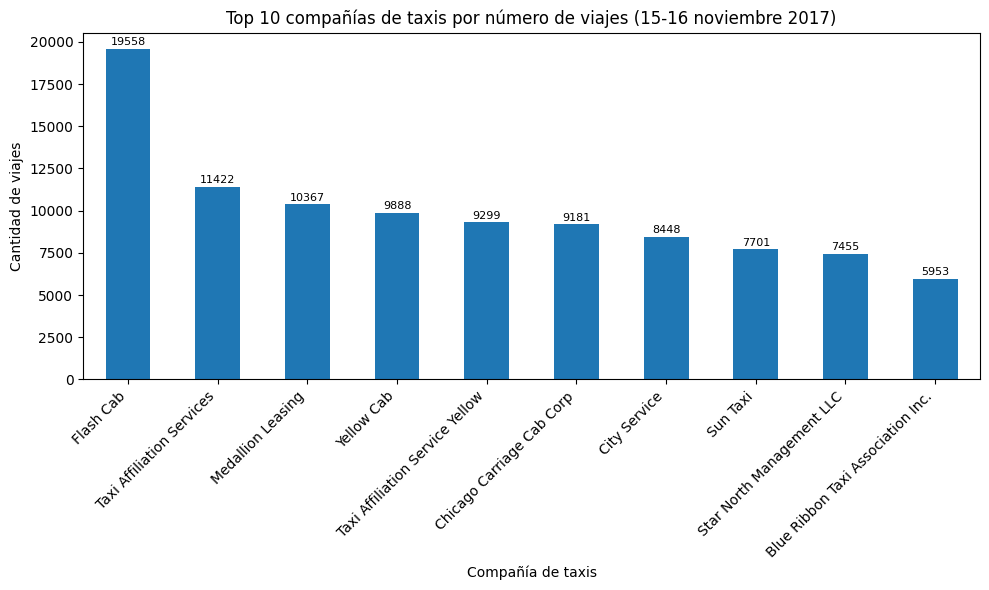

In [2]:
# Identificar los 10 principales barrios en términos de finalización
top_10_neighborhoods = df_sql_result_04.nlargest(10, 'average_trips')

# Hacer gráficos: empresas de taxis y número de viajes, y los 10 barrios principales por número de finalizaciones
import matplotlib.pyplot as plt

# Gráfico de los 10 barrios principales por número de finalizaciones
plt.figure(figsize=(12, 6))
top_10_neighborhoods.plot(kind='bar', x='dropoff_location_name', y='average_trips', legend=False)
plt.title('Top 10 barrios con mayor viajes finalizados (noviembre 2017)')
plt.ylabel('Promedio de viajes')
plt.xlabel('Barrios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Segmentar los 10 competidores con mayores viajes 
top_10_companies = df_sql_result_01.sort_values(by='trips_amount', ascending=False).head(10)

# Crear el gráfico del top 10
plt.figure(figsize=(10, 6))
ax = top_10_companies.plot(
    kind='bar', 
    x='company_name', 
    y='trips_amount', 
    legend=False,
    ax=plt.gca()
)

plt.title('Top 10 compañías de taxis por número de viajes (15-16 noviembre 2017)')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Compañía de taxis')

# Agregar los números de viajes encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

# Ajustar la rotación de las etiquetas en el eje x
plt.xticks(rotation=45, ha='right')

# Ajustar espaciado para evitar superposición
plt.tight_layout()
plt.show()


# **Conclusión**
El barrio El barrio "Loop" es el principal destino al tener el promedio de viajes mas altos finalizados, despúes les siguen los barrios River North y Streeterville a partir del cuarto lugar ('West Loop'), se observa una caída notable en el promedio de viajes al igual que no concentrar tantos esfuerzos en otros barrios que a pesar de estar en el top 10 tienen un numero significativamente menor en cuanto a demanda.
**Estrategia de demanda:** Los datos sugieren que los barrios donde se deben de concentrar la mayor cantidad de viajes y vehiculos (flotilla vehicular) son 'Loop', 'River North', y 'Streeterville' ya que son aquellos barrios con mayor demanda asegurando así una buena distribución de los recursos de la compañia.
**Promociones específicas:** Zuber podría considerar ofertas o promociones específicas para estos barrios para atraer más conductores y pasajeros.

**Compañias lideres del mercado**
La gráfica muestra una gran desigualdad en la cantidad de viajes entre las compañías de taxis, con un pequeño grupo dominando la mayor parte del mercado en donde destaca la compañía Flash Cab las siguientes compañías en la lista, como "Taxi Affiliation Services" y "Yellow Cab", también registran un número significativo de viajes, aunque notablemente menos que Flash Cab, las primeras 10 compañías representan la mayoría de los viajes, mientras que las demás tienen un número de viajes considerablemente menor por lo que estas 10 compañias serían los principales competidores de la empresa y las estrategías que se generen para atracción de clientes tienen que ir enfocadas a quitarle consumidores a estas compañias tento con estrategias de precios, servicio, etc.


# **Paso 5. Prueba de hipótesis (Python)**

In [3]:
import pandas as pd
from scipy import stats

# Cargar el archivo CSV
path_07 = '/datasets/project_sql_result_07.csv'
df_sql_result_07 = pd.read_csv(path_07)

# Filtro de datos
saturday_rainy = df_sql_result_07[df_sql_result_07['weather_conditions'] == 'Bad']['duration_seconds']
saturday_clear = df_sql_result_07[df_sql_result_07['weather_conditions'] == 'Good']['duration_seconds']

# Prueba de Levene para comparar las varianzas
levene_stat, levene_p_value = stats.levene(saturday_rainy, saturday_clear)

# Nivel de significación para la prueba de Levene
alpha = 0.05

# Mostrar el resultado de la prueba de Levene
print(f'Levene statistic: {levene_stat}')
print(f'P-value (Levene test): {levene_p_value}')

# Decidir si las varianzas son iguales
equal_var = True if levene_p_value > alpha else False

# La prueba t de Student para muestras independientes usando el resultado de la prueba de Levene
t_stat, p_value = stats.ttest_ind(saturday_rainy, saturday_clear, equal_var=equal_var)

# Mostrar resultados de la prueba t
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Conclusión basada en la prueba t
if p_value < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes en sábados con lluvia SÍ ES diferente a la de los sábados sin lluvia.")
else:
    print("No se puede rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que la duración promedio de los viajes es diferente en sábados lluviosos y no lluviosos.")


Levene statistic: 0.38853489683656073
P-value (Levene test): 0.5332038671974493
T-statistic: 6.946177714041499
P-value: 6.517970327099473e-12
Rechazamos la hipótesis nula: La duración promedio de los viajes en sábados con lluvia SÍ ES diferente a la de los sábados sin lluvia.


**¿cómo planteaste las hipótesis nula y alternativa**

Se filtraron los días que tenian un clima llovioso (Bad) y los sabados que no tenía clima lluvioso (Good), despues probar estas hipótesis se utilizo una prueba t de Student para muestras independientes.

**Criterios utilizados**

Decisión:
Si el valor p es menor que el nivel de significancia (α=0.05), rechazamos la hipótesis nula y concluimos que la duración promedio de los viajes difiere entre los sábados lluviosos y no lluviosos.
Si el valor p es mayor o igual a 𝛼 no podemos rechazar la hipótesis nula, lo que implica que no hay suficiente evidencia para afirmar que el clima afecta la duración promedio de los viajes.

# **Conclusión de la hiotesis**

Dado que el valor p es muchísimo menor que el nivel de significancia, rechazamos la hipótesis nula. Esto significa que hay evidencia estadísticamente significativa para afirmar que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados con lluvia **es diferente** de la duración promedio de los viajes en los sábados sin lluvia.

# **Conclusion General**

 Es importante que la empresa centre sus esfurzos y distribuya su flotilla en los barrios de Loop, River North, Streterville, Wester Lopp y O;hare al ser los 5 barrios con mayor demanda, asi como realizar estategias de posicionamiento enfocadas a atacar a los usuarios principalmente de Flash Cab al ser la empresa con el mayor posicionamiento en el mercado.